# Project: Wrangling and Analyze Data

## Import Libraries needed for this project

In [85]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import tweepy
import json
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

## Data Gathering
In the section, data is gathered from **all** three different sources loaded into the notebook.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [86]:
# Load data into dataframe
df_twitter_archive = pd.read_csv("twitter-archive-enhanced.csv")

# Confirm if the dataframe has been created
df_twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [87]:
# Download image predictions data from the HTML link provided
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

with open(url.split('/')[-1], 'wb') as file:
    file.write(response.content)
    
# Load the downloaded image predictions data into datafram
df_image_predictions =pd.read_csv('image-predictions.tsv', sep = '\t')

# Confirm if the dataframe has been created
df_image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [4]:
# Create an API object to gather Twitter data
consumer_key = 'CONSUMER KEY'
consumer_secret = 'CONSUMER SECRET'
access_token = 'ACCES TOKEN'
access_secret = 'ACCESS SECRET'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

In [10]:
#Set list for all errors
errors = []

#Set a timer for tracking the download time
start = datetime.now()

# Download Tweets from Twitter
with open ('tweet_json.txt', 'w') as file:
        for tweet_id in list(df_twitter_archive['tweet_id']):
            try:
                tweets = api.get_status(tweet_id, tweet_mode='extended')
                json.dump(tweets._json, file)
                file.write('\n')     
            except:
                errors.append(tweet_id)
            
#End the timer for tracking the download time               
end = datetime.now()

#Calculate the duration taken
duration = end - start

#Display notification when download is complete
print("Download complete. Download duration was " + str(duration))

Download complete. Download duration was 0:06:05.696529


In [11]:
#Display the number of IDs with errors
num_errors = str(len(errors))
print("The number of IDs that could not be found are: " + num_errors)

The number of IDs that could not be found are: 1485


In [88]:
#Import the tweet_json text file into a Dataframe and confirm it's content
tweet_extended_df = pd.read_json("tweet_json.txt",dtype ={"id_str": str}, lines=True)[:-1]
tweet_extended_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 870 entries, 0 to 869
Data columns (total 32 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       870 non-null datetime64[ns]
display_text_range               870 non-null object
entities                         870 non-null object
extended_entities                715 non-null object
favorite_count                   870 non-null int64
favorited                        870 non-null bool
full_text                        870 non-null object
geo                              0 non-null float64
id                               870 non-null int64
id_str                           870 non-null object
in_reply_to_screen_name          32 non-null object
in_reply_to_status_id            32 non-null float64
in_reply_to_status_id_str        32 non-null float64
in_reply_to_user_id              32 non-null float64
in_reply_to_user_id_str          32 non-null fl

In [89]:
#Create a copy of the dataframe with the select columns and appropriate naming
df_current_tweets = tweet_extended_df[['id', 'favorite_count', 'retweet_count']].copy()

df_current_tweets.rename(columns={'id':'tweet_id'}, inplace=True)

df_current_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 870 entries, 0 to 869
Data columns (total 3 columns):
tweet_id          870 non-null int64
favorite_count    870 non-null int64
retweet_count     870 non-null int64
dtypes: int64(3)
memory usage: 20.5 KB


## Assessing Data
In this section, data is assessed both visually and programmatically to detect and document quality issues and tidiness issues. 

#### Explore the Twitter Archive Dataframe

In [90]:
df_twitter_archive.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,None,None,None,None
9,89024025534

In [91]:
df_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

`Observation:` It is noted that there are 181 retweets. Retweets are often tweets of other tweets and so this may imply duplicate data.

`Observation:` The timestamp column is a string and should rather be in a timestamp format

In [92]:
df_twitter_archive.sample(50)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2052,671486386088865792,NaN,NaN,2015-12-01 00:30:04 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Malcolm. He just saw a spider. 10/10 https://t.co/ympkwF65Dx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671486386088865792/photo/1,10,10,Malcolm,None,None,None,None
2085,670804601705242624,NaN,NaN,2015-11-29 03:20:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Mason. He's a total frat boy. Pretends to be Hawaiian. Head is unbelievably round. 10/10 would pet so damn well https://t.co/DM3ZP3AA7b,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670804601705242624/photo/1,10,10,Mason,None,None,None,None
11,889880896479866881,NaN,NaN,2017-07-25 16:11:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bruno. He is a service shark. Only gets out of the water to assist you. 13/10 terrifyingly good boy https://t.co/u1XPQMl29g,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889880896479866881/photo/1,13,10,Bruno,None,None,None,None
1052,742528092657332225,NaN,NaN,2016-06-14 01:24:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Maxaroni. He's pumped as hell for the summer. Been working on his beach bod for so long. 10/10 https://t.co/UHvjxm9B0O,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/742528092657332225/photo/1,https://twitter.com/dog_rates/status/742528092657332225/photo/1",10,10,Maxaroni,None,None,None,None
2322,666430724426358785,NaN,NaN,2015-11-17 01:40:41 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Oh boy what a pup! Sunglasses take this one to the next level. Weirdly folds front legs. Pretty big. 6/10 https://t.co/yECbFrSArM,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666430724426358785/photo/1,6,10,None,None,None,None,None
2342,666082916733198337,NaN,NaN,2015-11-16 02:38:37 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a well-established sunblockerspaniel. Lost his other flip-flop. 6/10 not very waterproof https://t.co/3RU6x0vHB7,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666082916733198337/photo/1,6,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,194351775.0,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
1658,683111407806746624,NaN,NaN,2016-01-02 02:23:45 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Larry. He thought the New Year's parties were tonight. 10/10 poor pupper. Maybe next year https://t.co/h3X0jK8MVM,NaN,NaN,NaN,https://twitter.com/dog_rates/status/683111407806746624/photo/1,10,10,Larry,None,None,pupper,None
352,831315979191906304,NaN,NaN,2017-02-14 01:35:49 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",I couldn't make it to the #WKCDogShow BUT I have people there on the ground relaying me the finest pupper pics possible. 13/10 for all https://t.co/jd6lYhfdH4,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/831315979191906304/photo/1,https://twitter.com/dog_rates/status/831315979191906304/photo/1,https://twitter.com/dog_rates/status/831315979191906304/photo/1,https://twitter.com/dog_rates/status/831315979191906304/photo/1",13,10,None,None,None,pupper,None
2105,670474236058800128,NaN,NaN,2015-11-28 05:28:09 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Honor to rate this dog. Great teeth.

##### Explore key fields within the Twitter archive dataframe: Name field

In [93]:
df_twitter_archive[df_twitter_archive.name.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,None,None,None
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a puppo that seems to be on the fence about something haha no but seriously someone help her. 13/10 https://t.co/BxvuXk0UCm,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388333682689/photo/1,13,10,None,None,None,None,puppo
23,887473957103951883,NaN,NaN,2017-07-19 00:47:34 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Canela. She attempted some fancy porch pics. They were unsuccessful. 13/10 someone help her https://t.co/cLyzpcUcMX,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1",13,10,Canela,None,None,None,None
24,887343217045368832,NaN,NaN,2017-07-18 16:08:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",You may not have known you needed to see this today. 13/10 please enjoy (IG: emmylouroo) https://t.co/WZqNqygEyV,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887343217045368832/video/1,13,10,None,None,None,None,None
25,887101392804085760,NaN,NaN,2017-07-18 00:07:08 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This... is a Jubilant Antarctic House Bear. We only rate dogs. Please only send dogs. Thank you... 12/10 would suffocate in floof https://t.co/4Ad1jzJSdp,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887101392804085760/photo/1,12,10,None,None,None,None,None
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@NonWhiteHat @MayhewMayhem omg hello tanner you are a scary good boy 12/10 would pet with extreme caution,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @Athletics: 12/10 #BATP https://t.co/WxwJmvjfxo,8.860537e+17,19607400.0,2017-07-15 02:44:07 +0000,"https://twitter.com/dog_rates/status/886053434075471873,https://twitter.com/dog_rates/status/886053434075471873",12,10,None,None,None,None,None
35,885518971528720385,NaN,NaN,2017-07-13 15:19:09 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I have a new hero and his name is Howard. 14/10 https://t.co/gzLHboL7Sk,NaN,NaN,NaN,https://twitter.com/4bonds2carbon/status/885517367337512960,14,10,None,None,None,None,None
37,885167619883638784,NaN,NaN,2017-07-12 16:03:00 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a corgi undercover as a malamute. Pawbably doing important investigative work. Zero control over tongue happenings. 13/10 https://t.co/44ItaMubBf,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/885167619883638784/photo/1,https://twitter.com/dog_rates/status/885167619883638784/photo/1,https://twitter.com/dog_rates/status/885167619883638784/photo/1,https://twitter.com/dog_rates/status/885167619883638784/photo/1",13,10,None,None,None,None,None
41,884441805382717440,NaN,NaN,2017-07-10 15:58:53 +0000,"<a href=""http://twitter

`Observation` It is noted that **None** is repeated for most of the dog names instead of NaN for null fields

In [94]:
df_twitter_archive.name.value_counts()

None           745
a              55 
Charlie        12 
Oliver         11 
Lucy           11 
Cooper         11 
Tucker         10 
Penny          10 
Lola           10 
Winston        9  
Bo             9  
Sadie          8  
the            8  
Daisy          7  
an             7  
Buddy          7  
Toby           7  
Bailey         7  
Jax            6  
Koda           6  
Leo            6  
Scout          6  
Rusty          6  
Oscar          6  
Bella          6  
Jack           6  
Stanley        6  
Milo           6  
Dave           6  
Phil           5  
              ..  
officially     1  
Fillup         1  
Karl           1  
Maya           1  
Combo          1  
River          1  
Patch          1  
Lipton         1  
Billl          1  
Loomis         1  
Lupe           1  
Darby          1  
Remy           1  
Ambrose        1  
Rambo          1  
Ralphus        1  
Gilbert        1  
Tycho          1  
Scott          1  
Chloe          1  
Furzey         1  
Mookie      

`Observation` There are inaccurate dog names such as **a, an** and **the**. We also notice that these inaccurate names begin with small letters

##### Explore key fields within the Twitter archive dataframe: Source field

In [21]:
#Expand columns in the twitter archive frame
pd.set_option('display.max_colwidth', -1)

df_twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


`Observation` Upon expanding the columns, it is noted that the source of the tweets are in the form of URLs. This can make it difficult to perform any analysis by the Tweet source

#### Explore the Image Predictions Dataframe

In [78]:
df_image_predictions.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


`Observation:` Inconsistent upper and lower cases in the **p1**, **p2** and **p3** columns

`Observation:` Underscore is used instead of spaces for the dog breed predictions

`Observation:` There are false predictions in all three columns, p1, p2 and p3. This can imply that these tweet IDs are not dogs at all

`Observation:` The **jpg_url** column should be part of the twitter_archives dataframe to determine tweets with images

`Observation:` The predicted dog breed should be selected from the image predictions table and merged with the twitter_archives dataframe

In [79]:
df_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


#### Explore the Current Tweets Dataframe

In [80]:
df_current_tweets.head()

,tweet_id,favorite_count,retweet_count
0,892420643555336193,33711,6975
1,892177421306343426,29237,5276
2,891815181378084864,21983,3466
3,891689557279858688,36810,7197
4,891327558926688256,35193,7721


In [81]:
df_current_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 870 entries, 0 to 869
Data columns (total 3 columns):
tweet_id          870 non-null int64
favorite_count    870 non-null int64
retweet_count     870 non-null int64
dtypes: int64(3)
memory usage: 20.5 KB


`Observation` The **favourite_count** and **retweet_count** columns should be part of the twitter_archives dataframe

### Quality issues

#### The twitter archive dataframe

1.There are 181 retweets. Retweets are often tweets of other tweets and so this may imply duplicate data. For the purpose of this analysis, only original tweets will be used.

2.The timestamp column is a string and should rather be in a timestamp format.

3.**None** is repeated for most of the dog names instead of NaN for null fields

4.There are inaccurate dog names such as **a, an** and **the**. We also notice that these inaccurate names begin with small letters

5.The source of the tweets are in the form of URLs. This can make it difficult to perform any analysis by the Tweet source


#### The image prediction dataframe
6.Inconsistent upper and lower cases in the **p1**, **p2** and **p3** columns

7.Underscore is used instead of spaces for the dog breed predictions in the **p1**, **p2** and **p3** columns

8.False predictions in all three columns, **p1**, **p2** and **p3**. This can imply that these tweet IDs are not dogs at all

### Tidiness issues

#### The twitter archive dataframe
1.The **jpg_url** column should be part of the twitter_archives dataframe

2.The **favourite_count** and **retweet_count** columns should be part of the twitter_archives dataframe

3.The predicted dog breed should be selected and merged with the twitter_archives dataframe

## Cleaning Data
In this section, **all** of the issues documented while assessing are cleaned

In [171]:
# Make copies of original pieces of data

# Copy of the Twitter Archive Data 
df_ta_clean = df_twitter_archive.copy()

# Copy of the Image Predictions Data
df_ip_clean = df_image_predictions.copy()

# Copy of the Current Tweets Data
df_ct_clean = df_current_tweets.copy()

### Issue #1:

#### Define: 
There are 181 retweets. Retweets are often tweets of other tweets and so this may imply duplicate data. 
All retweets are to be removed from the twitter archive dataset

#### Code

In [172]:
# Select only records from the Twitter Archive dataframe that aren't retweets
# This code removes the retweets and selects only the records that aren't retweets
df_ta_clean = df_ta_clean[df_ta_clean['retweeted_status_id'].isnull()]

#### Test

In [173]:
# Use the info function to identify if there are any retweeted tweets
df_ta_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(3), object(1

The retweeted_status_id field shows that there are no more retweets

### Issue #2:

#### Define
The timestamp column in the twitter archive dataset is a string and should rather be in a timestamp format

#### Code

In [174]:
# Code to change the timestamp column to a timestamp

df_ta_clean.timestamp = pd.to_datetime(df_ta_clean.timestamp, yearfirst = True)

#### Test

In [175]:
# Use the info function to confirm the change of timestamp
df_ta_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null datetime64[ns]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: datetime64[ns](1), flo

### Issue #3:

#### Define
Identify and replace irregular dog names such as **a, at, the** and **None** where dog names can be found

#### Code

In [176]:
# Create a dataframe with dog names from the text columns where the name column is None 
df_none = df_ta_clean[df_ta_clean.name.str.contains('None')].text.str.extract(r'(named\s\w+)').dropna()

# Create a dataframe with dog names from the text columns where the name column is a lowercase letter
df_lower_case = df_ta_clean[df_ta_clean.name.str.islower()].text.str.extract(r'(named\s\w+)').dropna()

# Append both dataframes
df_irregular_names = df_none.append(df_lower_case)

# Slice and obtain only the name field
df_correct_names = df_irregular_names[0].str.slice(6)

# Confirm the name field has been obtained for dogs with irregular names
df_correct_names

2166    Zeus     
2227    Guss     
2269    Tickles  
1853    Wylie    
1955    Kip      
2034    Jacob    
2066    Rufus    
2116    Spork    
2125    Cherokee 
2128    Hemry    
2146    Alphred  
2161    Alfredo  
2191    Leroi    
2204    Berta    
2218    Chuk     
2235    Alfonso  
2249    Cheryl   
2255    Jessiga  
2264    Klint    
2273    Kohl     
2304    Pepe     
2311    Octaviath
2314    Johm     
Name: 0, dtype: object

In [177]:
#Replace the names in the twitter archive dataframe with the origin
df_ta_clean.loc[df_correct_names.index, 'name'] = df_correct_names

In [178]:
#Replace all other remaining lower list names
df_ta_clean.name = df_ta_clean.name.replace(df_ta_clean[df_ta_clean.name.str.islower()].name, np.nan)

#### Test

In [179]:
# Confirm if all lower case names have been replaced
df_ta_clean.name.value_counts()

None        677
Charlie     11 
Lucy        11 
Cooper      10 
Oliver      10 
Penny       9  
Tucker      9  
Sadie       8  
Lola        8  
Winston     8  
Toby        7  
Daisy       7  
Oscar       6  
Koda        6  
Stanley     6  
Jax         6  
Bailey      6  
Bo          6  
Bella       6  
Leo         5  
Louis       5  
Bentley     5  
Milo        5  
Buddy       5  
Dave        5  
Chester     5  
Rusty       5  
Scout       5  
Chip        4  
Jack        4  
           ..  
Gidget      1  
Dante       1  
Monkey      1  
Ember       1  
Ralphus     1  
Rambo       1  
Ambrose     1  
Remy        1  
Teddy       1  
Zooey       1  
Pumpkin     1  
Storkson    1  
Birf        1  
Ester       1  
Laela       1  
Stu         1  
Koko        1  
Clarq       1  
Bruno       1  
Lassie      1  
Severus     1  
Goliath     1  
Sora        1  
Dudley      1  
Mona        1  
Lipton      1  
Loomis      1  
Lupe        1  
Darby       1  
Milky       1  
Name: name, Length: 950,

In [180]:
#Identify the names of dogs where the dog name was mentioned
df_ta_clean.loc[df_ta_clean.text.str.contains('named')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1853,675706639471788032,NaN,NaN,2015-12-12 15:59:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a Sizzlin Menorah spaniel from Brooklyn named Wylie. Lovable eyes. Chiller as hell. 10/10 and I'm out.. poof https://t.co/7E0AiJXPmI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675706639471788032/photo/1,10,10,Wylie,None,None,None,None
1955,673636718965334016,NaN,NaN,2015-12-06 22:54:44,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a Lofted Aphrodisiac Terrier named Kip. Big fan of bed n breakfasts. Fits perfectly. 10/10 would pet firmly https://t.co/gKlLpNzIl3,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673636718965334016/photo/1,10,10,Kip,None,None,None,None
2034,671743150407421952,NaN,NaN,2015-12-01 17:30:22,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a Tuscaloosa Alcatraz named Jacob (Yacōb). Loves to sit in swing. Stellar tongue. 11/10 look at his feet https://t.co/2IslQ8ZSc7,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671743150407421952/photo/1,11,10,Jacob,None,None,None,None
2066,671147085991960577,NaN,NaN,2015-11-30 02:01:49,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a Helvetica Listerine named Rufus. This time Rufus will be ready for the UPS guy. He'll never expect it 9/10 https://t.co/34OhVhMkVr,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671147085991960577/photo/1,9,10,Rufus,None,None,None,None
2116,670427002554466305,NaN,NaN,2015-11-28 02:20:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a Deciduous Trimester mix named Spork. Only 1 ear works. No seat belt. Incredibly reckless. 9/10 still cute https://t.co/CtuJoLHiDo,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670427002554466305/photo/1,9,10,Spork,None,None,None,None
2125,670361874861563904,NaN,NaN,2015-11-27 22:01:40,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a Rich Mahogany Seltzer named Cherokee. Just got destroyed by a snowball. Isn't very happy about it. 9/10 https://t.co/98ZBi6o4dj,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670361874861563904/photo/1,9,10,Cherokee,None,None,None,None
2128,670303360680108032,NaN,NaN,2015-11-27 18:09:09,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a Speckled Cauliflower Yosemite named Hemry. He's terrified of intruder dog. Not one bit comfortable. 9/10 https://t.co/yV3Qgjh8iN,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670303360680108032/photo/1,9,10,Hemry,None,None,None,None
2146,669923323644657664,NaN,NaN,2015-11-26 16:59:01,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a spotted Lipitor Rumpelstiltskin named Alphred. He can't wait for the Turkey. 10/10 would pet really well https://t.co/6GUGO7azNX,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669923323644657664/photo/1,10,10,Alphred,None,None,None,None
2161,669564461267722241,NaN,NaN,2015-11-25 17:13:02,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a Coriander Baton Rouge named Alfredo. Loves to cuddle with smaller well-dressed dog. 10/10 would hug lots https://t.co/eCRdwouKCl,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669564461267722241/photo/1,10,10,Alfredo,None,None,None,None
2166,669363888236994561,NaN,NaN,2015-11-25 03:56:01,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a Gingivitis Pumpernickel named Zeus. Unmatched tennis ball capacity. 10/10 would highly recommend https://t.co/jPkd7hhX7m

### Issue #4:

#### Define
Replace irregular dog names with **None** with NaN

#### Code

In [181]:
#Replace all dog names with None with Nan
df_ta_clean.name = df_ta_clean.name.replace('None', np.nan)

#### Test

In [182]:
#Confirm if all names with None have been replaced
df_ta_clean.name.value_counts()

Charlie     11
Lucy        11
Cooper      10
Oliver      10
Penny       9 
Tucker      9 
Lola        8 
Sadie       8 
Winston     8 
Daisy       7 
Toby        7 
Jax         6 
Bailey      6 
Oscar       6 
Stanley     6 
Koda        6 
Bo          6 
Bella       6 
Louis       5 
Leo         5 
Bentley     5 
Milo        5 
Buddy       5 
Dave        5 
Chester     5 
Scout       5 
Rusty       5 
Jeffrey     4 
Jack        4 
Jerry       4 
           .. 
Gidget      1 
Dante       1 
Monkey      1 
Ember       1 
Ralphus     1 
Rambo       1 
Ambrose     1 
Remy        1 
Teddy       1 
Zooey       1 
Pumpkin     1 
Storkson    1 
Birf        1 
Ester       1 
Laela       1 
Stu         1 
Koko        1 
Clarq       1 
Bruno       1 
Lassie      1 
Severus     1 
Goliath     1 
Sora        1 
Dudley      1 
Mona        1 
Lipton      1 
Loomis      1 
Lupe        1 
Darby       1 
Milky       1 
Name: name, Length: 949, dtype: int64

### Issue #5:

#### Define
Extract the distinct sources from the URL in the source field

#### Code

In [183]:
 # Identify all unique sources
df_ta_clean.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2042
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                        91  
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                     31  
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>    11  
Name: source, dtype: int64

In [184]:
# Replace the source url with the distinct names
df_ta_clean.source.replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>','Twitter for iPhone', inplace=True)
df_ta_clean.source.replace('<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>','Vine - Make a Scene', inplace=True)
df_ta_clean.source.replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>','Twitter Web Client', inplace=True)
df_ta_clean.source.replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>','TweetDeck', inplace=True)

#### Test

In [185]:
# Confirm all unique sources
df_ta_clean.source.value_counts()

Twitter for iPhone     2042
Vine - Make a Scene    91  
Twitter Web Client     31  
TweetDeck              11  
Name: source, dtype: int64

### Issue #6:

#### Define
Ensure consistency in upper and lower cases in the **p1**, **p2** and **p3** columns

#### Code

In [186]:
#Convert all the first letters of the p1, p2 and p3 columns to uppercase to ensure consistency
df_ip_clean.p1 = df_ip_clean.p1.str.title()
df_ip_clean.p2 = df_ip_clean.p2.str.title()
df_ip_clean.p3 = df_ip_clean.p3.str.title()

#### Test

In [187]:
#Confirm if the titles are consistent
df_ip_clean.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_Springer_Spaniel,0.465074,True,Collie,0.156665,True,Shetland_Sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature_Pinscher,0.074192,True,Rhodesian_Ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_Shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_Ridgeback,0.408143,True,Redbone,0.360687,True,Miniature_Pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature_Pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_Mountain_Dog,0.651137,True,English_Springer,0.263788,True,Greater_Swiss_Mountain_Dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,Box_Turtle,0.933012,False,Mud_Turtle,0.045885,False,Terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,Chow,0.692517,True,Tibetan_Mastiff,0.058279,True,Fur_Coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,Shopping_Cart,0.962465,False,Shopping_Basket,0.014594,False,Golden_Retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,Miniature_Poodle,0.201493,True,Komondor,0.192305,True,Soft-Coated_Wheaten_Terrier,0.082086,True


### Issue #7:

#### Define
Replace underscores with spaces for the dog breed predictions in the **p1**, **p2** and **p3** columns

#### Code

In [188]:
# Use a string replace function to search for and replace underscores in the p1, p2 and p3 columns
df_ip_clean.p1 =  df_ip_clean.p1.str.replace('_', ' ')

df_ip_clean.p2 =  df_ip_clean.p2.str.replace('_', ' ')

df_ip_clean.p3 =  df_ip_clean.p3.str.replace('_', ' ')

#### Test

In [189]:
#Confirm if spaces are used in-between breed type instead of underscores
df_ip_clean.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh Springer Spaniel,0.465074,True,Collie,0.156665,True,Shetland Sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature Pinscher,0.074192,True,Rhodesian Ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German Shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian Ridgeback,0.408143,True,Redbone,0.360687,True,Miniature Pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature Pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese Mountain Dog,0.651137,True,English Springer,0.263788,True,Greater Swiss Mountain Dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,Box Turtle,0.933012,False,Mud Turtle,0.045885,False,Terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,Chow,0.692517,True,Tibetan Mastiff,0.058279,True,Fur Coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,Shopping Cart,0.962465,False,Shopping Basket,0.014594,False,Golden Retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,Miniature Poodle,0.201493,True,Komondor,0.192305,True,Soft-Coated Wheaten Terrier,0.082086,True


### Issue #8:

#### Define
Remove tweet IDs where all predications from **p1, p2** and **p3** are false

#### Code

In [190]:
# Query to select only the True values from all the three predictions
df_ip_clean = df_ip_clean.query('(p1_dog != False) or (p2_dog != False) or (p3_dog != False)')

#### Test

In [191]:
#Confirm if there is tweet that was predicted to not be a dog from all three predictions
df_ip_clean.query('(p1_dog == False) and (p2_dog == False) and (p3_dog == False)')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


### Issue #9:

#### Define
Add the **jpg_url** column to the twitter_archives dataframe

#### Code

In [192]:
# Add the url_column to the Twitter Archive dataframe
df_ta_clean = pd.merge(df_ta_clean, df_ip_clean[['tweet_id', 'jpg_url']], on = 'tweet_id', how = 'left')

In [193]:
# Remove the jpg_url column from the Image predictions dataframe
df_ip_clean.drop('jpg_url', axis=1, inplace=True)

#### Test

In [194]:
# Confirm if the url column has been added to the Twitter Archive dataframe
df_ta_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 18 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null datetime64[ns]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          1414 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
jpg_url                       

In [195]:
# Confirm if the url column has been removed from the Image Prediction dataframe
df_ip_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 11 columns):
tweet_id    1751 non-null int64
img_num     1751 non-null int64
p1          1751 non-null object
p1_conf     1751 non-null float64
p1_dog      1751 non-null bool
p2          1751 non-null object
p2_conf     1751 non-null float64
p2_dog      1751 non-null bool
p3          1751 non-null object
p3_conf     1751 non-null float64
p3_dog      1751 non-null bool
dtypes: bool(3), float64(3), int64(2), object(3)
memory usage: 128.2+ KB


### Issue #10:

#### Define
Add the  **favourite_count** and **retweet_count** columns to the twitter_archives dataframe

#### Code

In [196]:
# Add the favourite_count and retweet_count columns to the twitter_archives dataframe
df_ta_clean = pd.merge(df_ta_clean, df_ct_clean, on = 'tweet_id', how = 'left')

df_ta_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 20 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null datetime64[ns]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          1414 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
jpg_url                       

### Issue #11:

#### Define
Obtain the dog breed from the image prediction dataframe and merge it with the twitter archive dataframe

#### Code

In [197]:
#For the purpose of our analysis, we shall take the correctly predicted dog from the first prediction only. 
df_ip_clean_prediction = df_ip_clean.query('p1_dog == True')

#Add create a column to df_ip_clean
df_ip_clean_prediction.rename(columns={'p1':'breed'}, inplace=True)

#Add the breed column to the df_ta_clean table
df_ta_clean = pd.merge(df_ta_clean, df_ip_clean_prediction[['tweet_id', 'breed']], on = 'tweet_id', how = 'left')

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [198]:
df_ta_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 21 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null datetime64[ns]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          1414 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
jpg_url                       

#### Test

In [199]:
#Confirm if the dog breeds have been added to the Twitter archive dataframe
df_ta_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url,favorite_count,retweet_count,breed
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None,NaN,33711.0,6975.0,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,29237.0,5276.0,Chihuahua
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,21983.0,3466.0,Chihuahua
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,36810.0,7197.0,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,35193.0,7721.0,Basset
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,NaN,None,None,None,None,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,17754.0,2589.0,Chesapeake Bay Retriever
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,None,None,None,None,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,10324.0,1648.0,Appenzeller
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40,Twitter for iPhone,When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,NaN,None,None,None,None,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,56685.0,15689.0,Pomeranian
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51,Twitter for iPhone,This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,None,None,None,None,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,24433.0,3605.0,Irish Terrier
9,890240255349198849,NaN,NaN,2017-0

In [126]:
df_ta_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 21 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null datetime64[ns]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          1414 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
jpg_url                       

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [200]:
df_ta_clean.to_csv('twitter_archive_master.csv', index = False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [201]:
#Import the cleaned twitter data
twitter_archive = pd.read_csv('twitter_archive_master.csv', encoding = 'utf-8')

In [202]:
#Confirm the data imported
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2175 entries, 0 to 2174
Data columns (total 21 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null float64
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          1414 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
jpg_url                       1686 no

In [203]:
#Explore the most popular dog names
twitter_archive.name.value_counts()

Charlie     11
Lucy        11
Cooper      10
Oliver      10
Penny       9 
Tucker      9 
Lola        8 
Sadie       8 
Winston     8 
Daisy       7 
Toby        7 
Jax         6 
Bailey      6 
Oscar       6 
Stanley     6 
Koda        6 
Bo          6 
Bella       6 
Louis       5 
Leo         5 
Bentley     5 
Milo        5 
Buddy       5 
Dave        5 
Chester     5 
Scout       5 
Rusty       5 
Jeffrey     4 
Jack        4 
Jerry       4 
           .. 
Gidget      1 
Dante       1 
Monkey      1 
Ember       1 
Ralphus     1 
Rambo       1 
Ambrose     1 
Remy        1 
Teddy       1 
Zooey       1 
Pumpkin     1 
Storkson    1 
Birf        1 
Ester       1 
Laela       1 
Stu         1 
Koko        1 
Clarq       1 
Bruno       1 
Lassie      1 
Severus     1 
Goliath     1 
Sora        1 
Dudley      1 
Mona        1 
Lipton      1 
Loomis      1 
Lupe        1 
Darby       1 
Milky       1 
Name: name, Length: 949, dtype: int64

In [204]:
#Explore the most used source for tweets
twitter_archive.source.value_counts()

Twitter for iPhone     2042
Vine - Make a Scene    91  
Twitter Web Client     31  
TweetDeck              11  
Name: source, dtype: int64

In [205]:
#Explore the most favorite breed
twitter_archive.groupby('breed')['favorite_count'].sum().nlargest(10)

breed
Golden Retriever      1106547.0
Pembroke              662878.0 
Labrador Retriever    531738.0 
Chihuahua             439853.0 
French Bulldog        379802.0 
Samoyed               364534.0 
Chow                  277255.0 
Cocker Spaniel        240860.0 
Cardigan              188411.0 
Pomeranian            178404.0 
Name: favorite_count, dtype: float64

In [206]:
#Explore the months with the most tweets made
pd.DatetimeIndex(twitter_archive['timestamp']).month.value_counts()

12    447
11    358
1     265
2     197
3     193
7     150
6     144
4     109
5     105
10    73 
9     69 
8     65 
Name: timestamp, dtype: int64

### Insights:
1. The most popular dog names are Charlie, Lucy, Cooper and Oliver

2. The twitter app was the most used source for tweets

3. The most favorite dog breed was the Golden Retriever which was favourited a total of 1,106,547 times

4. Most tweets were made between the months of November to January which is generally a holiday period. This possibly indicates that most people were able to engage the tweets because when they were more free, with breaks from work

### Visualization

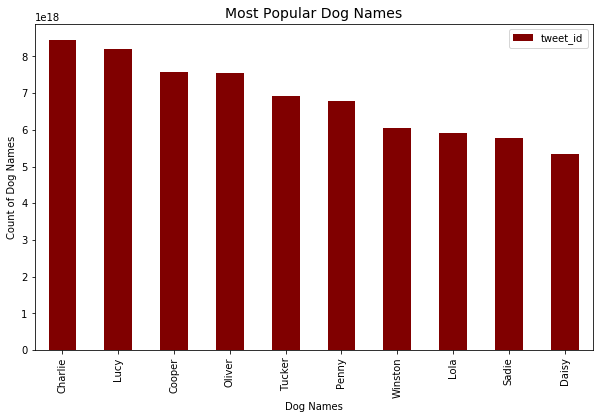

In [207]:
#Bar graph of the most popular dogs

#group the data and select the top 10
named_dogs = twitter_archive.groupby('name')['tweet_id'].sum().nlargest(10)
    
#sort the data in descending order
dogs_sorted = named_dogs.sort_values(ascending = False)
    
#describe/create the titles of the plot and style
dogs_sorted.plot(kind='bar', color = 'maroon', figsize = (10,6));
plt.xlabel('Dog Names');
plt.ylabel('Count of Dog Names');
plt.title('Most Popular Dog Names', fontsize = 14);
plt.legend();

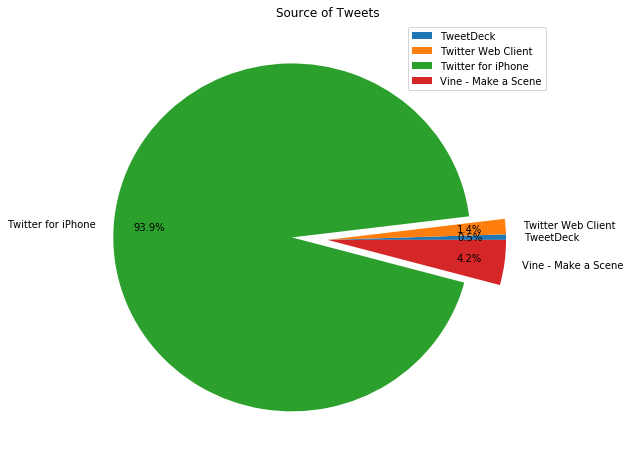

In [208]:
#Pie Chart of the sources of Tweet

#group the data by source
tweet_source = twitter_archive.groupby('source')['tweet_id'].count()
        
#describe/create the titles of the plot and style
tweet_source.plot(kind='pie', figsize = (8,8), autopct='%1.1f%%', label='', pctdistance=0.8, labeldistance=1.1, explode=(0,0,0.2,0));
plt.title("Source of Tweets")
plt.legend();